[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ivanvladimir/maquinas_notebooks/blob/main/lfya/02%20La%20m%C3%A1quina%20sin%20memoria.ipynb)

In [1]:
!pip install maquinas --upgrade

Requirement already up-to-date: maquinas in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages
Requirement already up-to-date: graphviz in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from maquinas)
Requirement already up-to-date: ipywidgets in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from maquinas)
Requirement already up-to-date: IPython in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from maquinas)
Requirement already up-to-date: ordered_set in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from maquinas)
Requirement already up-to-date: Pillow in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from maquinas)
Requirement already up-to-date: TatSu in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from maquinas)
Requirement already up-to-date: ipykernel>=4

Requirement already up-to-date: nbclient<0.6.0,>=0.5.0 in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from nbconvert->notebook>=4.4.1->widgetsnbextension~=3.5.0->ipywidgets->maquinas)
Requirement already up-to-date: bleach in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from nbconvert->notebook>=4.4.1->widgetsnbextension~=3.5.0->ipywidgets->maquinas)
Requirement already up-to-date: mistune<2,>=0.8.1 in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from nbconvert->notebook>=4.4.1->widgetsnbextension~=3.5.0->ipywidgets->maquinas)
Requirement already up-to-date: MarkupSafe>=0.23 in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/site-packages (from jinja2->notebook>=4.4.1->widgetsnbextension~=3.5.0->ipywidgets->maquinas)
Requirement already up-to-date: typing-extensions>=3.6.4; python_version < "3.8" in /home/ivanvladimir/projects/maquinas_notebooks/env/lib/python3.6/s

In [2]:
from maquinas.io import load_fa
from maquinas.simulation import Simulation

In [3]:
bes_pares=load_fa("""
      | a  | b
->q0] | q0 | q1
  q1  | q1 | q0
""")
bes_pares.print_summary()

States  : q0, q1
Sigma   : a, b
Initial : q0
Aceptors: q0
Transitions:
 q0,a → ('q0',)
 q0,b → ('q1',)
 q1,a → ('q1',)
 q1,b → ('q0',)


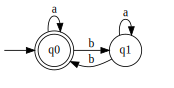

In [4]:
bes_pares.graph()

In [5]:
cadenas=["aaa","aab",'abb','bba','bba','baa']
for w in cadenas:
    print(f"Probando con {w} el AFD arroja:",bes_pares.accepts(w))

Probando con aaa el AFD arroja: True
Probando con aab el AFD arroja: False
Probando con abb el AFD arroja: True
Probando con bba el AFD arroja: True
Probando con bba el AFD arroja: True
Probando con baa el AFD arroja: False


In [6]:
bes_pares1=load_fa("""
      | a  | b
->q0  | q0 | q1
  q1] | q1 | q0
""")
bes_pares1.print_summary()

States  : q0, q1
Sigma   : a, b
Initial : q0
Aceptors: q1
Transitions:
 q0,a → ('q0',)
 q0,b → ('q1',)
 q1,a → ('q1',)
 q1,b → ('q0',)


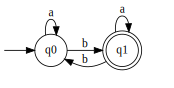

In [7]:
bes_pares1.graph()

In [8]:
cadenas=["aaa","aab",'abb','bba','bba','baa']
for w in cadenas:
    print(f"Probando con {w} el AFD arroja:",bes_pares1.accepts(w))

Probando con aaa el AFD arroja: False
Probando con aab el AFD arroja: True
Probando con abb el AFD arroja: False
Probando con bba el AFD arroja: False
Probando con bba el AFD arroja: False
Probando con baa el AFD arroja: True


In [9]:
bes_pares2=load_fa("""
      | a  | b
->q0] | q0 | q1
  q1] | q1 | q0
""")
bes_pares2.print_summary()

States  : q0, q1
Sigma   : a, b
Initial : q0
Aceptors: q1, q0
Transitions:
 q0,a → ('q0',)
 q0,b → ('q1',)
 q1,a → ('q1',)
 q1,b → ('q0',)


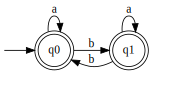

In [10]:
bes_pares2.graph()

In [11]:
cadenas=["aaa","aab",'abb','bba','bba','baa']
for w in cadenas:
    print(f"Probando con {w} el AFD arroja:",bes_pares2.accepts(w))

Probando con aaa el AFD arroja: True
Probando con aab el AFD arroja: True
Probando con abb el AFD arroja: True
Probando con bba el AFD arroja: True
Probando con bba el AFD arroja: True
Probando con baa el AFD arroja: True


In [12]:
s=Simulation(bes_pares,"baaabaaabb")
s.run()

In [13]:
for q,a,w_ in bes_pares.delta_stepwise("abbaa"):
    if a:
        print(f"{a} -> {q}", end=",\n ")
    else:
        print(f"{q}",end="\n ")
    res=q
    
print(f"\nCon {res} Se acepta?", "Sí" if bes_pares.acceptor(res) else "No" )

q0
 a -> {'q0'},
 b -> {'q1'},
 b -> {'q0'},
 a -> {'q0'},
 a -> {'q0'},
 
Con {'q0'} Se acepta? Sí
